<a href="https://colab.research.google.com/github/avii-001/Machine_Learning/blob/main/PredictSmartwatchPrice_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting price of Smartwarch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Problem identification
# Business Understanding
# Collecting Data
# Pre-Procession Data
# Analyzing data
# Data Modeling
# Data Evaluation
# Model Training
# Model Depl;


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kusumm/Data Science/data/smartwatches.csv')
df.head(5)

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [ ]:
df.shape

(450, 16)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Brand,0
Current Price,10
Original Price,73
Discount Percentage,73
Rating,6
Number OF Ratings,59
Model Name,35
Dial Shape,123
Strap Color,123
Strap Material,69


In [ ]:
# df.dropna(inplace=True)

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
df.dtypes

,0
Brand,object
Current Price,float64
Original Price,float64
Discount Percentage,float64
Rating,float64
Number OF Ratings,float64
Model Name,object
Dial Shape,object
Strap Color,object
Strap Material,object


For Display size column

In [ ]:
# Check N/A values
df['Display Size'].isna().sum()

0

In [ ]:
# Fill N/A values as 0.0
df['Display Size'].fillna('0.0 inches', inplace=True)

In [ ]:
# Splitting data and choosing 1st index
# float('35.9 inches'.split()[0])
# lambda x:float(x.split()[0])

35.9

In [ ]:
df['Display Size']=df['Display Size'].apply(lambda x:float(x.split()[0]))

In [ ]:
df['Display Size'].replace(0.0, np.nan, inplace=True)

For weight Column

In [ ]:
df['Weight'].value_counts()

,count
Weight,
20 - 35 g,80
75g +,66
35 - 50 g,58
<= 20 g,43
50 - 75 g,17


In [ ]:
numerical_df=df.select_dtypes(include=['int64','float64'])
categorical_df=df.select_dtypes(include=['object'])

In [ ]:
numerical_df.describe()

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


<Axes: >

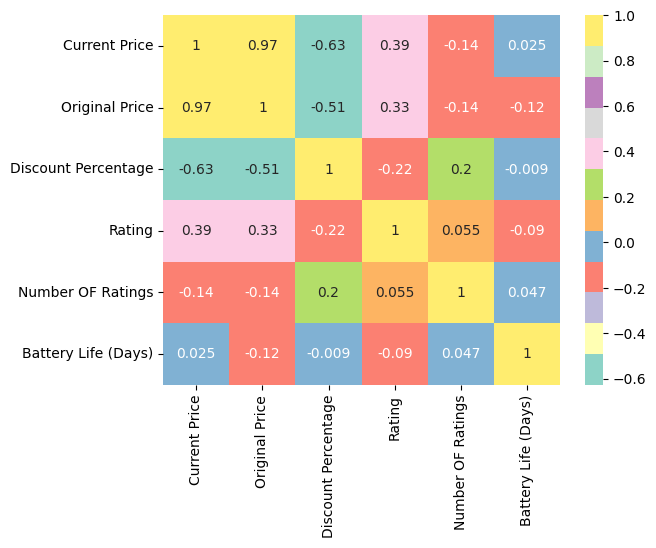

In [ ]:
corelation =numerical_df.corr()
sns.heatmap(corelation,cmap='Set3',annot=True)

In [ ]:
numerical_df.skew()

,0
Current Price,2.724376
Original Price,2.668311
Discount Percentage,-0.944123
Rating,-1.570849
Number OF Ratings,10.220186
Battery Life (Days),-0.183545


In [ ]:
# Determining feature & target datasets
# X=df[['Original Price','Rating','Number OF Ratings','Battery Life (Days)']]
X=df[['Original Price']]

y=df['Current Price']

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

**Adding constant to get intercept <br>
if constant is not added, y=0 when x=0. (which is not true(invalid assumption in real-wolrd datasets)).**

In [ ]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)

# Fitting regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

MissingDataError: exog contains inf or nans


#### **OLS (Ordinary Least Squares) objective:**
**To find the best-fitting line by minimizing the sum of squared residuals.**<br>(differences between observed and predicted values) (Optimal Line)
####**How OLS Works**:
1. Model Prediction:
  * For every x, the model predicts y_pred=c+mx
2. Residual Calculation:
  * Residual (Error that model makes) = Actual Value(y) - Predicted Value
3. Sum of Squared Residuals
  * To avoid cancellation of +ve & -ve erros, residuals are squared.
  * SSR=sum(y-y_pred)^2
4. Minimization:
  * OLS finds the values of c & m that minimizes SSR

In [ ]:
lr.params

In [ ]:
print(lr.summary())

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,	-2740.633273+0.856599*X_train,color='r')
plt.show()

In [ ]:
y_train_pred=lr.predict(X_train_sm)
res=(y_train-y_train_pred)

In [ ]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train- y_train_pred', fontsize=15)
plt.show()


In [ ]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
mean_square=np.sqrt(mean_squared_error(y_test,y_pred))
mean_square

In [ ]:
r_squared=r2_score(y_test,y_pred)
r_squared

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,	-2740.633273+0.856599*X_test,color='r')
plt.show()

In [ ]:
y_test_pred=lr.predict(X_test_sm)
res=(y_test-y_test_pred)

fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_test- y_test_pred', fontsize=15)
plt.show()

In [ ]:
# Metrics:
# RMSE: Measures the average error in predictions. Lower values are better.
# R^2: Indicates how well the model explains test data variance.